# OpenCV Basics

In [119]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

In [120]:
#!pip install bokeh
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook

In [121]:
output_notebook()

Loading BokehJS ...

In [122]:
# Helper Functions
def display(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    
# Function to Display video in the notebook
def display_vid(name):
    cap = cv.VideoCapture(name)

    ret, frame = cap.read()
    frame=cv.cvtColor(frame, cv.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    frame=cv.flip(frame, -1) # because Bokeh flips vertically
    width=frame.shape[1] // 2 # decreasing display size
    height=frame.shape[0] // 2 # decreasing display size
    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
    myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)
    while True:
        ret, frame = cap.read()
        if ret:
            frame=cv.cvtColor(frame, cv.COLOR_BGR2RGBA)
            frame=cv.flip(frame, -1)
            myImage.data_source.data['image']=[frame]
            push_notebook()
            time.sleep(0)
        else:
            break

## Opening Files

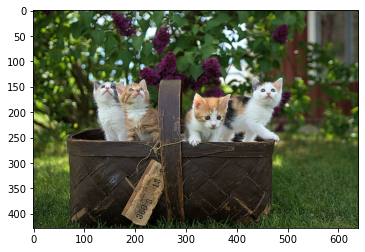

In [123]:
img = cv.imread("Data/Photos/cats.jpg")
display(img)

In [124]:
name = 'Data/Videos/dog.mp4'
display_vid(name)

## Transformations

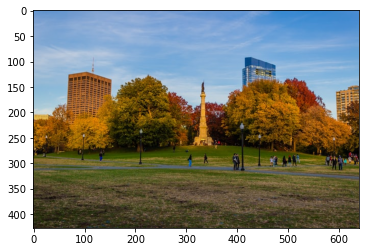

In [125]:
img = cv.imread('Data/Photos/park.jpg')
display(img)

#### Translation

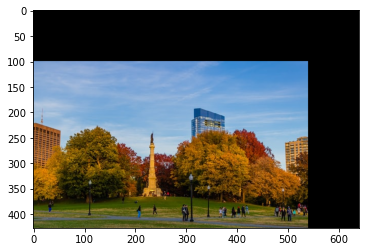

In [126]:
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

translated = translate(img, -100, 100)
display(translated)

#### Rotation

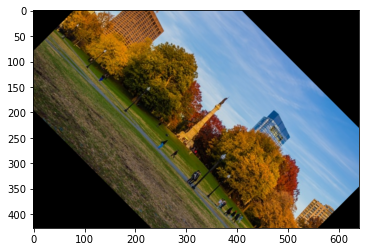

In [127]:
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)
    
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, -45)
display(rotated)

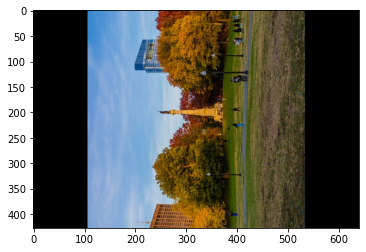

In [128]:
rotated = rotate(img, 90)
display(rotated)

#### Resizing

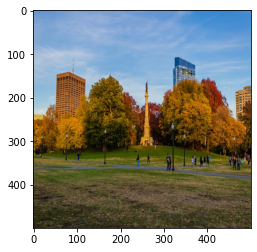

In [129]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
display(resized)

#### Flipping

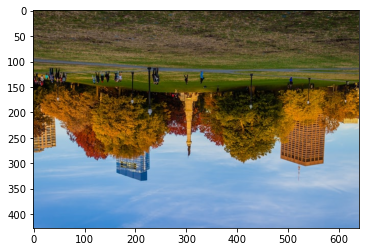

In [130]:
flip = cv.flip(img, -1)
display(flip)

#### Cropping

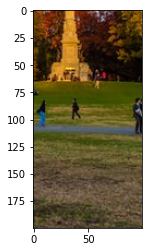

In [131]:
cropped = img[200:400, 300:400]
display(cropped)

## Drawing Shapes and Putting Text

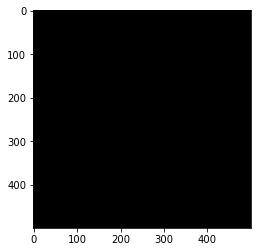

In [132]:
blank = np.zeros((500,500,3), dtype='uint8')
display(blank)

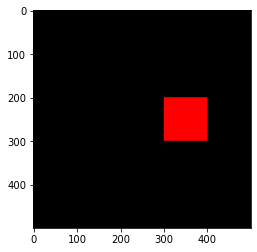

In [133]:
# 1. Paint the image a certain colour
blank[200:300, 300:400] = 0,0,255
display(blank)

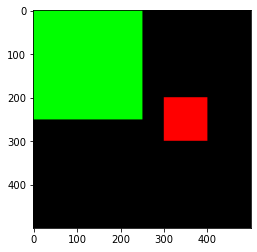

In [134]:
# 2. Draw a Rectangle
cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1)
display(blank)

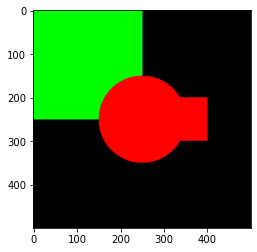

In [135]:
# 3. Draw A circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 100, (0,0,255), thickness=-1)
display(blank)

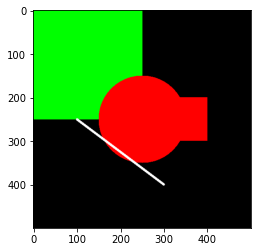

In [136]:
# 4. Draw a line
cv.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
display(blank)

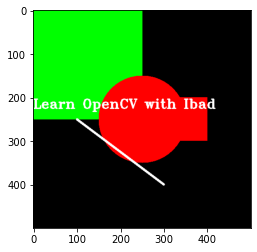

In [137]:
# 5. Write text
cv.putText(blank, 'Learn OpenCV with Ibad', (0,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (255,255,255), 2)
display(blank)

## Essential Functions in OpenCV

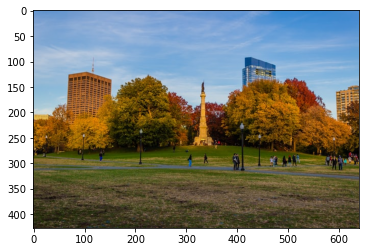

In [138]:
img = cv.imread('Data/Photos/park.jpg')
display(img)

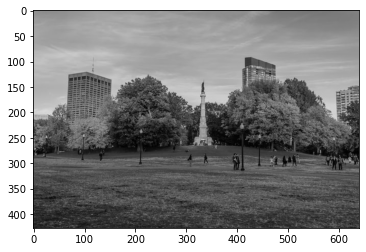

In [139]:
# Converting to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display(gray)

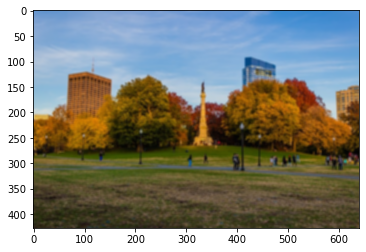

In [140]:
# Blur 
blur = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT)
display(blur)

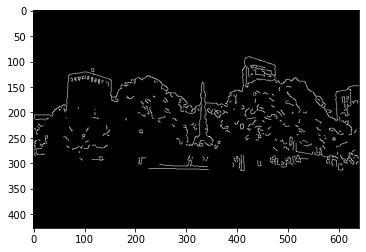

In [141]:
# Edge Cascade
canny = cv.Canny(blur, 125, 175)
display(canny)

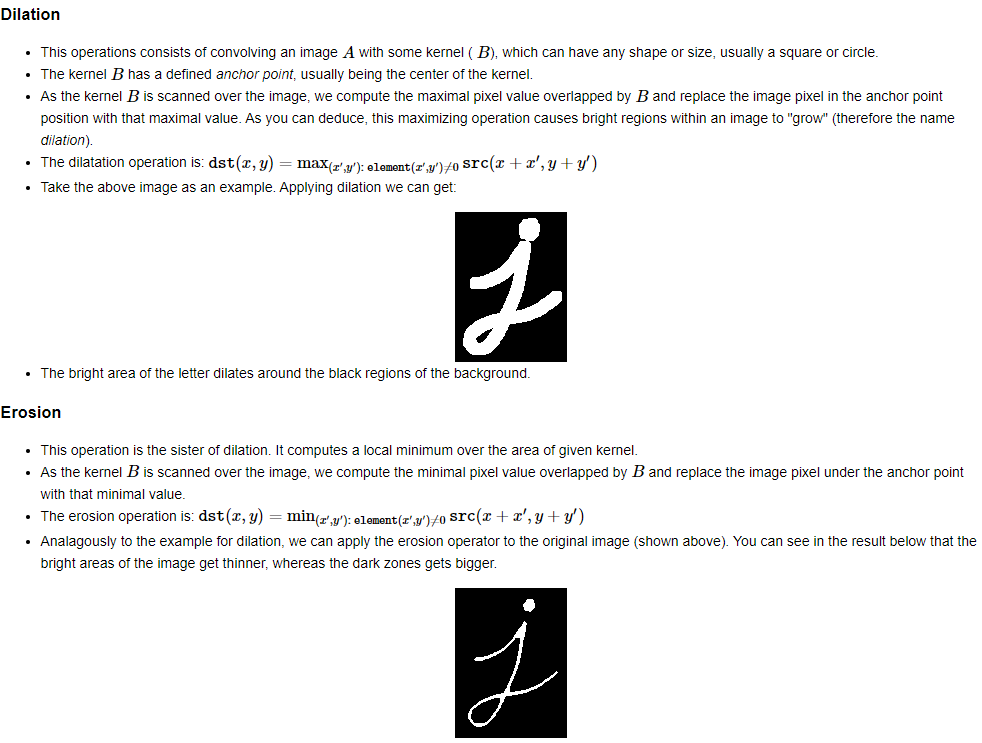

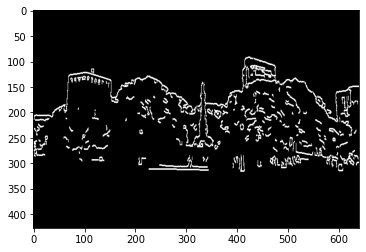

In [142]:
# Dilating the image
dilated = cv.dilate(canny, (7,7), iterations=2)
display(dilated)

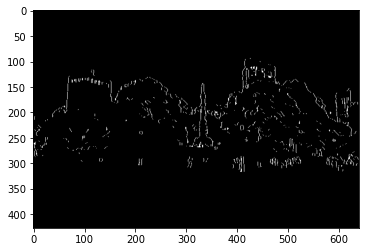

In [143]:
# Eroding
eroded = cv.erode(dilated, (7,7), iterations=3)
display(eroded)

### Thresholding

#### Simple Thresholding
Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. 

#### Adaptive Thresholding
In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

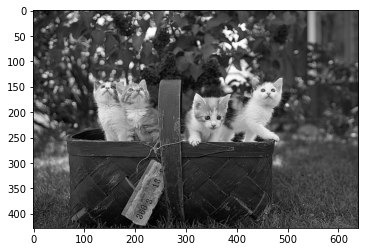

In [144]:
img = cv.imread('Data/Photos/cats.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display(gray)

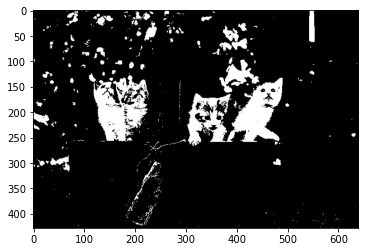

In [145]:
# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY )
display(thresh)

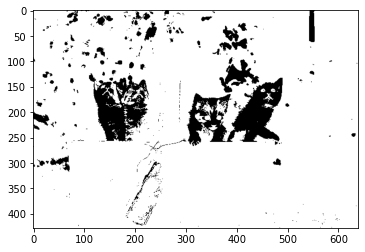

In [146]:
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV )
display(thresh_inv)

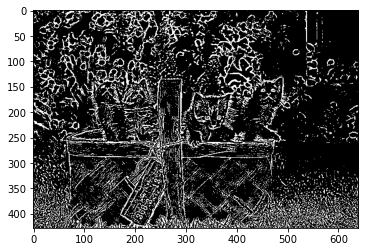

In [147]:
# Adaptive Thresholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
display(adaptive_thresh)

## Contour Detection

#### What are contours?
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

* For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
* Since OpenCV 3.2, findContours() no longer modifies the source image but returns a modified image as the first of three return parameters.
* In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

#### How to draw the contours?
To draw the contours, cv.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

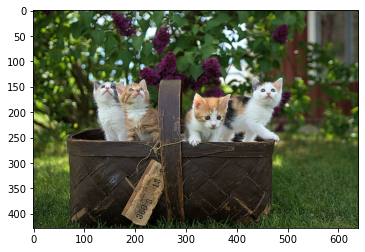

In [148]:
img = cv.imread('Data/Photos/cats.jpg')
display(img)

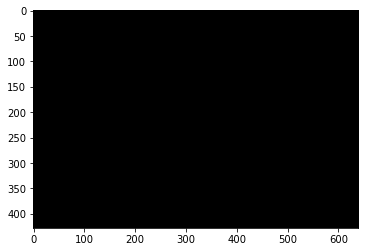

In [149]:
blank = np.zeros(img.shape, dtype='uint8')
display(blank)

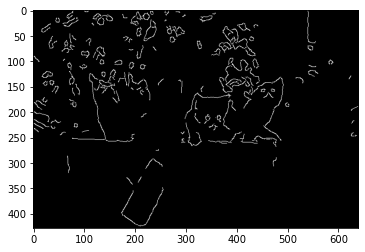

In [150]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display(gray)
blur = cv.GaussianBlur(gray, (7,7), cv.BORDER_DEFAULT)
display(blur)
canny = cv.Canny(blur, 100, 150)
display(canny)

In [151]:
contours, hierarchies = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # cv.RETR_EXTERNAL, cv.RETR_TREE (for all hierarchical contours), cv.RETR_LIST(for all contours)
print(f'{len(contours)} contour(s) found!')

284 contour(s) found!


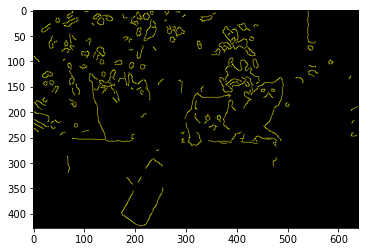

In [152]:
cv.drawContours(blank, contours, -1, (0,255,255), 1)
display(blank)